In [27]:
import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [28]:
# Cargar los modelos desde los ficheros
best_rf_regressor_12 = joblib.load('best_rf_regressor.pkl')
best_xgboost_regressor_12 = joblib.load('best_xgboost_regressor.pkl')
best_catboost_regressor_12 = joblib.load('best_catboost_regressor.pkl')

In [29]:
file = open('factores.txt','r')

factores_12 = []
for i in file:
    print(i)
    factores_12.append(i.replace('\n',''))

factor_rf_12 = float(factores_12[0])
factor_catboost_12 = float(factores_12[1])
factor_xgboost_12 = float(factores_12[2])
total_mse_12 = float(factores_12[3])

0.02427205387205387

0.015327489948598063

0.015870318295453774

0.0554698621161057


In [30]:
df = pd.read_excel('36_months.xlsx')
df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
df = df.drop('USREC', axis = 1)

In [31]:
df.head()

,date,VIX,Unemployment,Interest_Rates,YIC,M2 MONEY STOCK,PER CAPITA CONSUMPTION,CONSUMER PRICE INDEX
0,2024-06-30,0.066596,0.052525,0.642025,0.228866,1.056446,1.003872,1.003278
1,2024-07-31,0.079528,0.052231,0.643652,0.238730,1.065915,1.008148,1.006898
2,2024-08-31,0.094972,0.051933,0.645395,0.254272,1.075952,1.012496,1.010761
3,2024-09-30,0.113414,0.051635,0.647172,0.274516,1.083775,1.016857,1.014793
4,2024-10-31,0.135437,0.051337,0.648959,0.296583,1.090272,1.021220,1.018946


In [32]:
x_real = df.drop(['date'], axis = 1)
x_real = df.drop(['date'], axis = 1)

rf_test_pred_12 = best_rf_regressor_12.predict(x_real)
xgboost_test_pred_12 = best_xgboost_regressor_12.predict(x_real)
catboost_test_pred_12 = best_catboost_regressor_12.predict(x_real)

In [33]:
predictions_12 = pd.DataFrame()

predictions_12['Random Forest'] = rf_test_pred_12*100
predictions_12['XG Boost'] = xgboost_test_pred_12*100
predictions_12['Catboost'] = catboost_test_pred_12*100



columns_to_scale = predictions_12.columns  

# Inicializar el objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar el escalado Min-Max a las columnas seleccionadas
predictions_12[columns_to_scale] = scaler.fit_transform(predictions_12[columns_to_scale])

predictions_12['Probabilidad ponderada'] = (((predictions_12['Random Forest']/factor_rf_12) + (predictions_12['XG Boost']/factor_xgboost_12) + (predictions_12['Catboost']/factor_catboost_12))*total_mse_12).round(2)

column_to_normalize = 'Probabilidad ponderada'
min_value = predictions_12[column_to_normalize].min()
max_value = predictions_12[column_to_normalize].max()

predictions_12[column_to_normalize] = (predictions_12[column_to_normalize] - min_value) / (max_value - min_value)

# Aplicar el escalado Min-Max a la columna 'probabilidad'
predictions_12['Probabilidad ponderada'] = predictions_12['Probabilidad ponderada']*100

In [34]:
predictions_12.tail(15)

,Random Forest,XG Boost,Catboost,Probabilidad ponderada
21,1.0,0.988999,0.940889,97.382770
22,1.0,0.999285,0.995703,99.890949
23,1.0,0.999285,0.995703,99.890949
24,1.0,0.999285,0.995703,99.890949
25,1.0,0.999285,0.997170,100.000000
26,1.0,0.999285,0.997170,100.000000
27,1.0,0.999285,0.997170,100.000000
28,1.0,0.999285,0.997296,100.000000
29,1.0,0.999285,0.997296,100.000000
30,1.0,0.988999,1.000000,99.672846


In [35]:
predictions_12['date'] = df['date']

In [36]:
predictions_12.tail(5)

,Random Forest,XG Boost,Catboost,Probabilidad ponderada,date
31,1.0,0.988999,0.945186,97.491821,2027-01-31
32,1.0,0.988999,0.927585,96.837514,2027-02-28
33,1.0,0.988999,0.857173,94.002181,2027-03-31
34,1.0,0.988999,0.857947,94.111232,2027-04-30
35,1.0,1.000000,0.785067,91.603053,2027-05-31


In [37]:
predictions_total =  predictions_12

In [38]:
predictions_total

,Random Forest,XG Boost,Catboost,Probabilidad ponderada,date
0,0.000000,0.015644,0.138340,3.707743,2024-06-30
1,0.000000,0.015644,0.138026,3.598691,2024-07-31
2,0.000000,0.015644,0.135282,3.489640,2024-08-31
3,0.000000,0.015644,0.134051,3.489640,2024-09-30
4,0.000000,0.015644,0.129414,3.271538,2024-10-31
5,0.039216,0.035464,0.091830,3.598691,2024-11-30
6,0.000000,0.011455,0.082426,1.308615,2024-12-31
7,0.029412,0.042458,0.000000,0.000000,2025-01-31
8,0.000000,0.043360,0.215423,7.742639,2025-02-28
9,0.107843,0.000000,0.364633,14.721919,2025-03-31


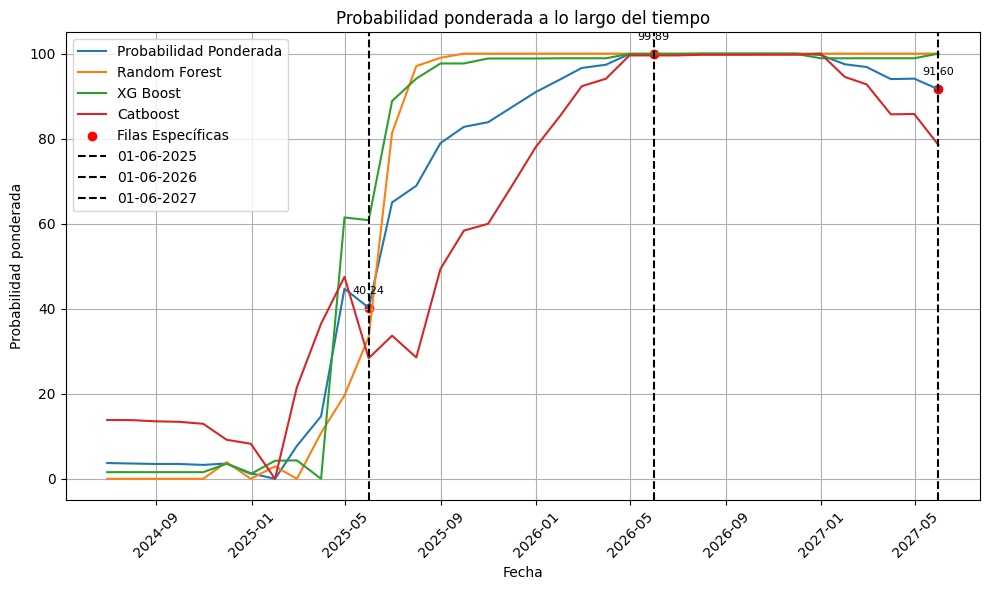

In [39]:
indices_to_highlight = [11, 23, 35]
filtered_data = predictions_total.iloc[indices_to_highlight]


# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))  # Tamaño opcional del gráfico
plt.plot(df['date'], predictions_total['Probabilidad ponderada'], linestyle='-', label='Probabilidad Ponderada')
plt.plot(df['date'], predictions_total['Random Forest']*100, linestyle='-', label='Random Forest')
plt.plot(df['date'], predictions_total['XG Boost']*100, linestyle='-', label='XG Boost')
plt.plot(df['date'], predictions_total['Catboost']*100, linestyle='-', label='Catboost')

# Añadir puntos específicos
plt.scatter(filtered_data['date'], filtered_data['Probabilidad ponderada'], color='red', label='Filas Específicas')

# Anotar los valores en el gráfico
for i, row in filtered_data.iterrows():
    plt.annotate(f'{row["Probabilidad ponderada"]:.2f}', 
                 (row['date'], row['Probabilidad ponderada']), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center', 
                 fontsize=8)

# Añadir línea roja vertical en el día 01-04-2001
# intersect_date = pd.Timestamp('2020-03-01')
plt.axvline(pd.Timestamp('2025-05-31'), color='black', linestyle='--', label='01-06-2025')
plt.axvline(pd.Timestamp('2026-05-31'), color='black', linestyle='--', label='01-06-2026')
plt.axvline(pd.Timestamp('2027-05-31'), color='black', linestyle='--', label='01-06-2027')


# Encontrar el valor de 'Probabilidad ponderada' en la fecha de intersección, esto es para los gráficos de las recesiones anteriores


# intersect_value = predictions_total.loc[predictions_total['date'] == '2020-02-29', 'Probabilidad ponderada'].values[0]

# # Anotar el valor en el gráfico
# plt.annotate(f'{intersect_value:.2f}', 
#              (intersect_date, intersect_value), 
#              textcoords="offset points", 
#              xytext=(0, 10), 
#              ha='left', 
#              fontsize=12, 
#              color='red')

# Personalizar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Probabilidad ponderada')
plt.title('Probabilidad ponderada a lo largo del tiempo')

# Mostrar el gráfico
plt.grid(True)  # Mostrar cuadrícula
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.legend()

plt.tight_layout()  # Ajustar el diseño
plt.show()